In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import ConcatDataset, DataLoader, Sampler, Dataset
from src.data_loader import *
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random
import os
from src.ann_model import ANN, create_dataloader, save_checkpoint, convert_tensor

In [2]:
from src.data_loader import *

In [3]:
data = split_dataset()

In [4]:
data.keys()

dict_keys(['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test'])

In [5]:
data['X_test']

,RM,PTRATIO,LSTAT,year,Units Sold,Active Listings,Months Supply of Inventory,New Listings,Pending Sales,Days to Off Market,Sold to Original Price Ratio,Price per Square Foot,month
0,0.0,0.0,0.0,2020,170.0,295.0,1.7,172.0,156.0,0.71,0.964,253.0,1.0
1,0.0,0.0,0.0,2020,106.0,305.0,2.9,134.0,79.0,99.00,0.939,320.0,1.0
2,0.0,0.0,0.0,2022,1692.0,1770.0,1.0,2096.0,1466.0,17.00,1.076,418.0,6.0
3,0.0,0.0,0.0,2019,425.0,795.0,1.9,528.0,454.0,36.00,1.005,445.0,6.0
4,0.0,0.0,0.0,2020,324.0,1321.0,4.1,912.0,461.0,38.00,0.986,734.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.0,0.0,0.0,2019,889.0,1880.0,2.1,1127.0,878.0,35.00,0.998,745.0,6.0
61,0.0,0.0,0.0,2020,31.0,81.0,2.6,65.0,67.0,53.00,0.987,296.0,6.0
62,0.0,0.0,0.0,2019,195.0,426.0,2.2,290.0,184.0,67.00,0.956,409.0,1.0
63,0.0,0.0,0.0,2021,126.0,106.0,0.8,101.0,105.0,32.00,1.027,306.0,6.0


## Predict the housing price of 3 years future

In [6]:
data['future_pred'] = data['X_test']
data['future_pred']['year'] = data['future_pred']['year'] + 3
data['future_pred'].head()

,RM,PTRATIO,LSTAT,year,Units Sold,Active Listings,Months Supply of Inventory,New Listings,Pending Sales,Days to Off Market,Sold to Original Price Ratio,Price per Square Foot,month
0,0.0,0.0,0.0,2023,170.0,295.0,1.7,172.0,156.0,0.71,0.964,253.0,1.0
1,0.0,0.0,0.0,2023,106.0,305.0,2.9,134.0,79.0,99.00,0.939,320.0,1.0
2,0.0,0.0,0.0,2025,1692.0,1770.0,1.0,2096.0,1466.0,17.00,1.076,418.0,6.0
3,0.0,0.0,0.0,2022,425.0,795.0,1.9,528.0,454.0,36.00,1.005,445.0,6.0
4,0.0,0.0,0.0,2023,324.0,1321.0,4.1,912.0,461.0,38.00,0.986,734.0,6.0


In [7]:
X_future_pred, y_test = convert_tensor(data['future_pred'], data['y_test'])
X_future_pred.shape, y_test.shape

(torch.Size([65, 13]), torch.Size([65]))

In [8]:
roi_loader = create_dataloader(X_future_pred, y_test, batch_size=1)
roi_loader

In [9]:
params = {'num_layers': 20,
          'hidden_dim':13**2,
          'epoch': 1000,
          'lr': 1.5e-5,
          'loss_function':F.l1_loss}

model = ANN(input_dim=13, hidden_dim=params['hidden_dim'], output_dim=1, num_layers=params['num_layers'])
PATH = './saves/ann_20_1000.pth'
saved_model = torch.load(PATH)
model.load_state_dict(saved_model['model'])

<All keys matched successfully>

In [10]:
print(model)

ANN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=169, bias=True)
    (1): ReLU()
    (2): Linear(in_features=169, out_features=169, bias=True)
    (3): ReLU()
    (4): Linear(in_features=169, out_features=169, bias=True)
    (5): ReLU()
    (6): Linear(in_features=169, out_features=169, bias=True)
    (7): ReLU()
    (8): Linear(in_features=169, out_features=169, bias=True)
    (9): ReLU()
    (10): Linear(in_features=169, out_features=169, bias=True)
    (11): ReLU()
    (12): Linear(in_features=169, out_features=169, bias=True)
    (13): ReLU()
    (14): Linear(in_features=169, out_features=169, bias=True)
    (15): ReLU()
    (16): Linear(in_features=169, out_features=169, bias=True)
    (17): ReLU()
    (18): Linear(in_features=169, out_features=169, bias=True)
    (19): ReLU()
    (20): Linear(in_features=169, out_features=169, bias=True)
    (21): ReLU()
    (22): Linear(in_features=169, out_features=169, bias

In [11]:
with torch.no_grad():
    model.eval()
    y_pred = []
    y_true = []
    year = []
    for i, batch in enumerate(roi_loader):
        output = model(batch[0]).reshape(-1)
        y_pred.append(output.detach().numpy())
        y_true.append(batch[1].detach().numpy())
        year.append(np.array(batch[0][:, 3]))

In [12]:
year = np.array(year)
np.unique(year)

array([2020., 2021., 2022., 2023., 2024., 2025.], dtype=float32)

In [13]:
obj = {}
for y in np.unique(year):
    y = int(y)
    s = 'medv_' + str(y)
    obj[s] = []
obj

{'medv_2020': [],
 'medv_2021': [],
 'medv_2022': [],
 'medv_2023': [],
 'medv_2024': [],
 'medv_2025': []}

In [14]:
for i in range(len(year)):
    if year[i] == 2020:
        obj['medv_'+ str(int(year[i]))].append((y_pred[i], y_true[i]))
    elif year[i] == 2021:
        obj['medv_'+ str(int(year[i]))].append([y_pred[i], y_true[i]])
    elif year[i] == 2022:
        obj['medv_'+ str(int(year[i]))].append([y_pred[i], y_true[i]])
    elif year[i] == 2023:
        obj['medv_'+ str(int(year[i]))].append([y_pred[i], y_true[i]])
    elif year[i] == 2024:
        obj['medv_'+ str(int(year[i]))].append([y_pred[i], y_true[i]])
    elif year[i] == 2025:
        obj['medv_'+ str(int(year[i]))].append([y_pred[i], y_true[i]])

In [15]:
for dic in list(obj.keys()):
    obj[dic] = np.array(obj[dic]).reshape(-1, 2)

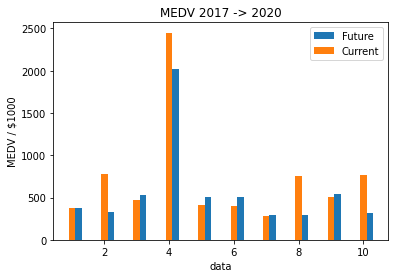

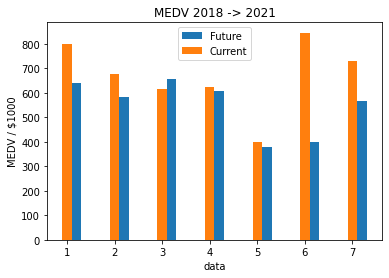

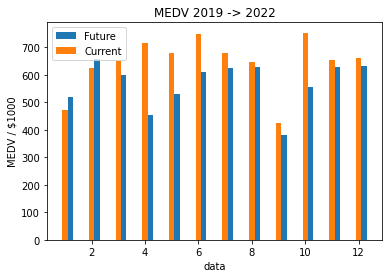

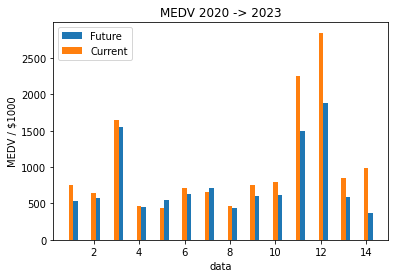

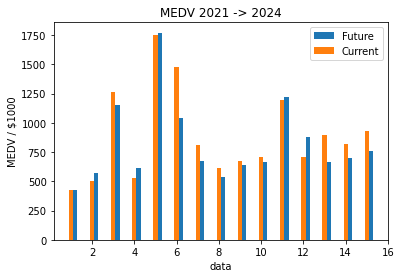

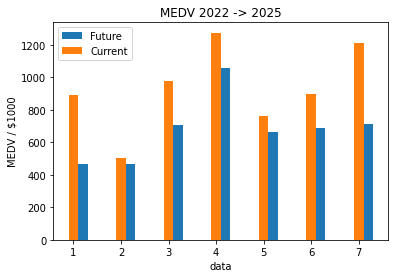

In [16]:
for dic in list(obj.keys()):
    width = 0.4
    x_dummy = np.linspace(1, len(obj[dic][:, 0]), len(obj[dic][:, 0]))

    plt.bar(x_dummy+0.2, obj[dic][:, 0], width/2, label='Future')
    plt.bar(x_dummy, obj[dic][:, 1], width/2, label='Current')
    plt.legend()
    plt.xlabel('data')
    plt.ylabel('MEDV / $1000')
    
    current_year = int(dic.split('_')[1]) - 3
    predicted_year = int(dic.split('_')[1])
    
    plt.title(f'MEDV {current_year} -> {predicted_year}')
    plt.show()


In [17]:
obj.keys()

dict_keys(['medv_2020', 'medv_2021', 'medv_2022', 'medv_2023', 'medv_2024', 'medv_2025'])

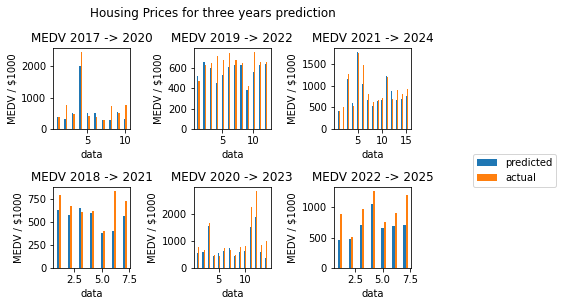

In [18]:
fig, axs = plt.subplots(2, 3)
m, n, l = 0, 0, 0
width = 0.4

for i in range(len(list(obj.keys()))):
    x_dummy = np.linspace(1, len(obj[list(obj.keys())[i]][:, 0]), len(obj[list(obj.keys())[i]][:, 0]))
    if i % 2 == 0:
        current_year = int(list(obj.keys())[i].split('_')[1]) - 3
        predicted_year = int(list(obj.keys())[i].split('_')[1])
        
        axs[0, m].bar(x_dummy, obj[list(obj.keys())[i]][:, 0], width/2, label='Future') 
        axs[0, m].bar(x_dummy+width/2, obj[list(obj.keys())[i]][:, 1], width/2, label='Current')
        axs[0, m].set_title(f'MEDV {current_year} -> {predicted_year}')
    
        m += 1
        
    elif i % 2 == 1:
        current_year = int(list(obj.keys())[i].split('_')[1]) - 3
        predicted_year = int(list(obj.keys())[i].split('_')[1])
        
        axs[1, n].bar(x_dummy, obj[list(obj.keys())[i]][:, 0], width/2, label='predicted') 
        axs[1, n].bar(x_dummy+width/2, obj[list(obj.keys())[i]][:, 1], width/2, label='actual')
        axs[1, n].set_title(f'MEDV {current_year} -> {predicted_year}')
        n += 1
            
for ax in axs.flat:
    ax.set(xlabel='data', ylabel='MEDV / $1000')

fig.tight_layout()
plt.legend(loc=(1.8, 1))
fig.suptitle('Housing Prices for three years prediction', y=1.05)
fig.savefig('./figure/medv_ann_3yrs_pred.pdf', dpi=300, bbox_inches='tight')

## ROI prediction for five years
#### All data for 2020 to predict 2025

In [42]:
num_year = 5

In [43]:
data['X_test'].head()

,RM,PTRATIO,LSTAT,year,Units Sold,Active Listings,Months Supply of Inventory,New Listings,Pending Sales,Days to Off Market,Sold to Original Price Ratio,Price per Square Foot,month
0,0.0,0.0,0.0,2023,170.0,295.0,1.7,172.0,156.0,0.71,0.964,253.0,1.0
1,0.0,0.0,0.0,2023,106.0,305.0,2.9,134.0,79.0,99.00,0.939,320.0,1.0
2,0.0,0.0,0.0,2025,1692.0,1770.0,1.0,2096.0,1466.0,17.00,1.076,418.0,6.0
3,0.0,0.0,0.0,2022,425.0,795.0,1.9,528.0,454.0,36.00,1.005,445.0,6.0
4,0.0,0.0,0.0,2023,324.0,1321.0,4.1,912.0,461.0,38.00,0.986,734.0,6.0


In [44]:
data['2020_future_pred'] = data['X_test'][data['X_test']['year'] == 2020]
data['2020_future_pred']['year'] = data['2020_future_pred']['year'] + num_year
data['2020_future_pred'].head()

/Users/manami/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RM,PTRATIO,LSTAT,year,Units Sold,Active Listings,Months Supply of Inventory,New Listings,Pending Sales,Days to Off Market,Sold to Original Price Ratio,Price per Square Foot,month
5,0.0,0.0,0.0,2025,6.0,62.0,1.7,8.0,4.0,43.0,1.005,190.0,1.0
8,0.0,0.0,0.0,2025,98.0,132.0,1.4,74.0,69.0,43.0,0.998,204.0,6.0
21,0.0,0.0,0.0,2025,379.0,626.0,1.7,327.0,288.0,41.0,0.992,247.0,6.0
23,0.0,0.0,0.0,2025,8.0,29.0,3.6,16.0,15.0,56.0,0.945,617.0,6.0
29,0.0,0.0,0.0,2025,43.0,150.0,1.4,45.0,35.0,28.0,1.011,260.0,1.0


In [45]:
data['2020_future_pred'].index.values

array([ 5,  8, 21, 23, 29, 30, 31, 36, 42, 57])

In [46]:
new_y_test = []
for i in data['2020_future_pred'].index.values:
    new_y_test.append(data['y_test'][i])
new_y_test = np.array(new_y_test)

In [47]:
data['2020_y_test'] = pd.DataFrame(new_y_test)

In [48]:
X_future_pred, y_test = convert_tensor(data['2020_future_pred'], data['2020_y_test'])
X_future_pred.shape, y_test.shape

(torch.Size([10, 13]), torch.Size([10, 1]))

In [49]:
roi_loader = create_dataloader(X_future_pred, y_test, batch_size=1)
roi_loader

In [50]:
params = {'num_layers': 20,
          'hidden_dim':13**2,
          'epoch': 1000,
          'lr': 1.5e-5,
          'loss_function':F.l1_loss}

model = ANN(input_dim=13, hidden_dim=params['hidden_dim'], output_dim=1, num_layers=params['num_layers'])
PATH = './saves/ann_20_1000.pth'
saved_model = torch.load(PATH)
model.load_state_dict(saved_model['model'])

<All keys matched successfully>

In [51]:
with torch.no_grad():
    model.eval()
    y_pred = []
    y_true = []
    year = []
    for i, batch in enumerate(roi_loader):
        output = model(batch[0]).reshape(-1)
        y_pred.append(output.detach().numpy())
        y_true.append(batch[1].detach().numpy())
        year.append(np.array(batch[0][:, 3]))

In [52]:
year = np.array(year)
year = int(np.unique(year))
obj = {'medv_' + str(year): []}
obj

{'medv_2025': []}

In [53]:
for i in range(len(y_pred)):
    roi = y_pred[i] - y_true[i]
    obj['medv_2025'].append([float(y_pred[i]), float(y_true[i]), float(roi)])
obj['medv_2025'] = np.array(obj['medv_2025'])

In [54]:
## predicted, current, ROI
obj['medv_2025'].reshape(-1, 3)

array([[ 291.74804688,  750.        , -458.25195312],
       [ 329.18856812,  777.5       , -448.31143188],
       [ 500.91360474,  395.        ,  105.91360474],
       [ 532.44354248,  470.        ,   62.44354248],
       [ 508.39102173,  416.75      ,   91.64102173],
       [ 287.69442749,  281.5       ,    6.19442749],
       [ 373.28894043,  379.        ,   -5.71105957],
       [ 540.49035645,  509.8999939 ,   30.59036255],
       [2021.38977051, 2450.        , -428.61022949],
       [ 316.97900391,  766.25      , -449.27099609]])

In [55]:
roi_df_2020_2025 = pd.DataFrame(obj['medv_2025'], columns=['2025', '2020', 'ROI'])
roi_df_2020_2025

,2025,2020,ROI
0,291.748047,750.000000,-458.251953
1,329.188568,777.500000,-448.311432
2,500.913605,395.000000,105.913605
3,532.443542,470.000000,62.443542
4,508.391022,416.750000,91.641022
5,287.694427,281.500000,6.194427
6,373.288940,379.000000,-5.711060
7,540.490356,509.899994,30.590363
8,2021.389771,2450.000000,-428.610229
9,316.979004,766.250000,-449.270996


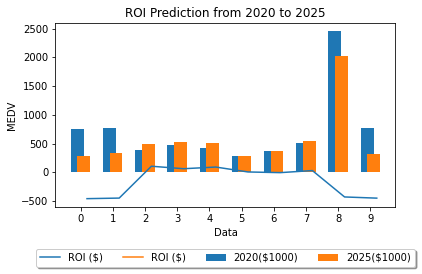

In [56]:
X_axis = np.arange(len(roi_df_2020_2025))
  
plt.bar(X_axis - 0.1, roi_df_2020_2025['2020'], 0.4, label = '2020($1000)')
plt.bar(X_axis + 0.1, roi_df_2020_2025['2025'], 0.4, label = '2025($1000)')
plt.plot(X_axis + 0.1 + 0.1, roi_df_2020_2025['ROI'], 0.4, label = 'ROI ($)')
  
plt.xticks(X_axis, [f'{i}' for i in range(len(roi_df_2020_2025))])
plt.xlabel("Data")
plt.ylabel("MEDV")
plt.title("ROI Prediction from 2020 to 2025")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.savefig('./figure/ROI_2020_2025.pdf', dpi=300)
plt.show()